In [5]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [6]:
dataset=pd.read_csv('CLV.csv')

In [7]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [8]:
len(dataset) # of rows

303

In [9]:
dataset.describe().transpose() #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


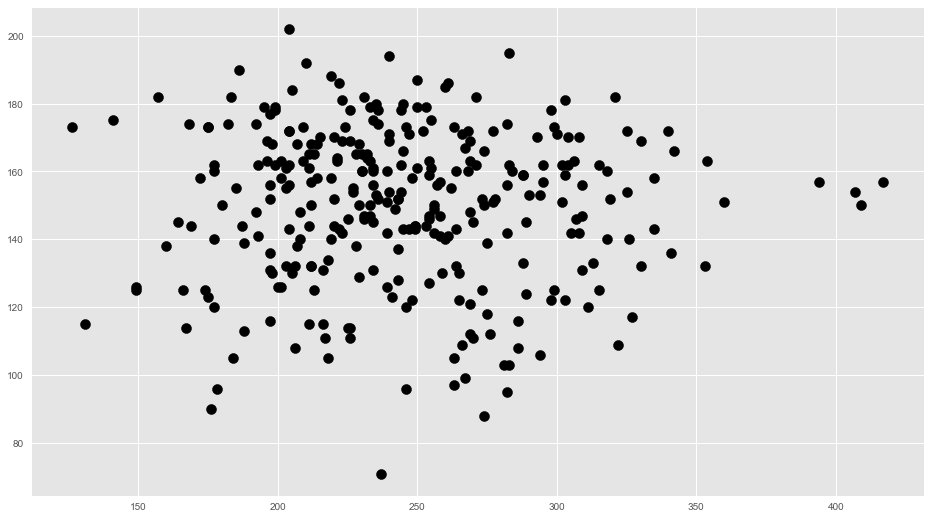

In [12]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

Clustering fundamentals

In [14]:
X=dataset.iloc[:,[0,1]].values

In [16]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.3618396084064086
For n_clusters=5, The Silhouette Coefficient is 0.33501999301430946
For n_clusters=6, The Silhouette Coefficient is 0.3689930147198941
For n_clusters=7, The Silhouette Coefficient is 0.36047847829548096
For n_clusters=8, The Silhouette Coefficient is 0.3603118868409036
For n_clusters=9, The Silhouette Coefficient is 0.3523862514454216
For n_clusters=10, The Silhouette Coefficient is 0.35352514662649154


In [18]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 868805.4785478548
k: 2  cost: 416914.67764462065
k: 3  cost: 297101.3764201943
k: 4  cost: 235568.75630353513
k: 5  cost: 193333.51167275637
k: 6  cost: 158999.20745160058
k: 7  cost: 135314.10167803388
k: 8  cost: 115686.57935998778
k: 9  cost: 102546.93727877043
k: 10  cost: 91556.28599714936



In [19]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

In [103]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

array([0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1,

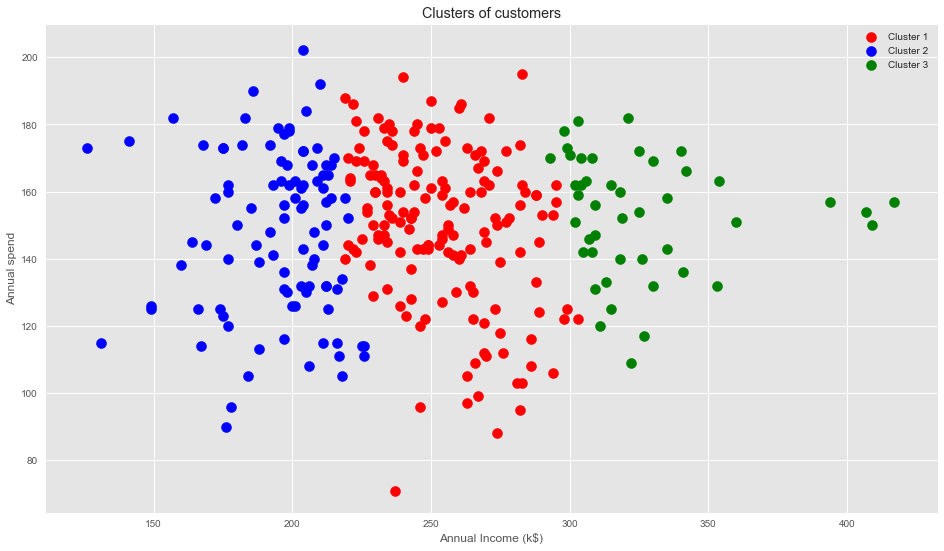

In [90]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()